In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

In [145]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE

In [146]:
customer_data = pd.read_csv("/content/train.csv")

In [147]:
customer_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


**1. Exploratory Data Analysis**

In [148]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [149]:
customer_data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [150]:
object_cols = [i for i in customer_data.columns if customer_data[i].dtype =="O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


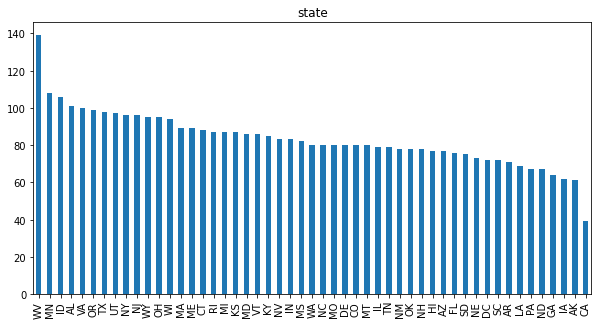

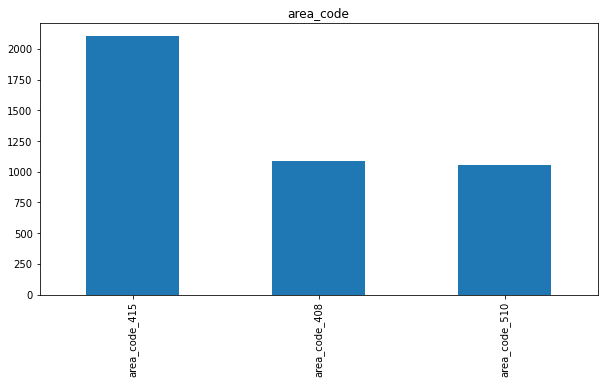

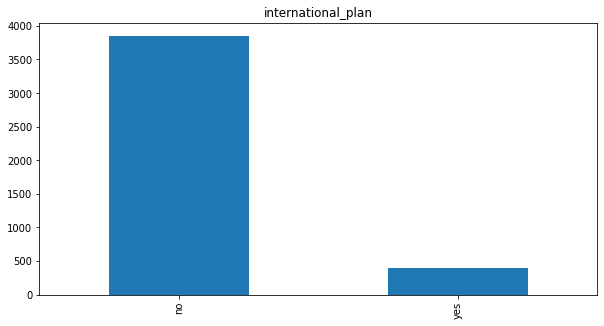

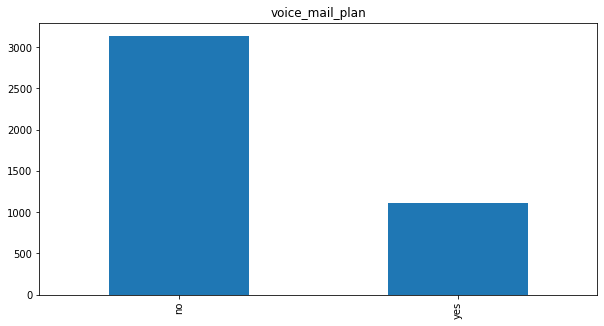

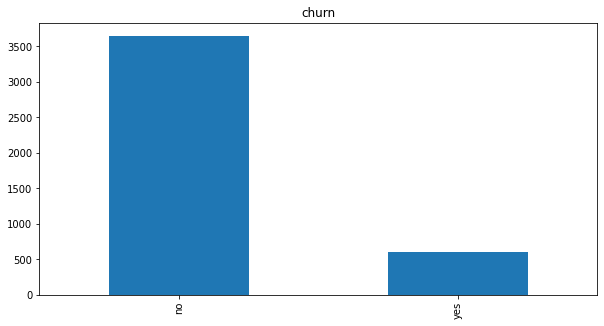

In [151]:
for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(10,5))
  plt.title(col)
  plt.show()

In [152]:
numerical_cols = [j for j in customer_data.columns if customer_data[j].dtype !="O"]
print(numerical_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


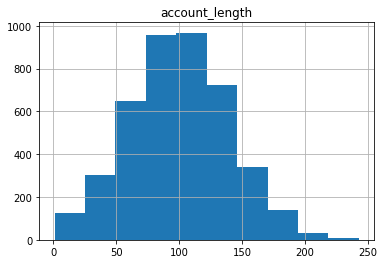

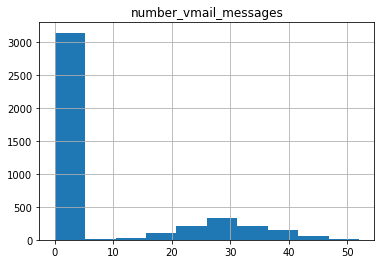

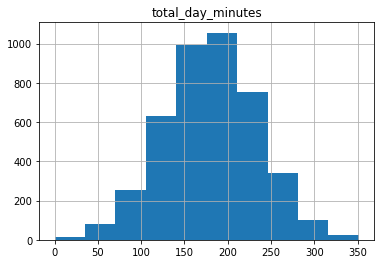

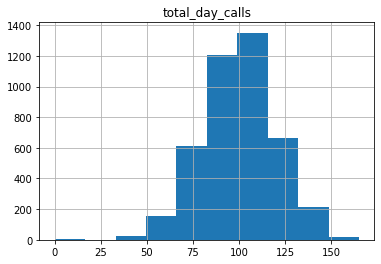

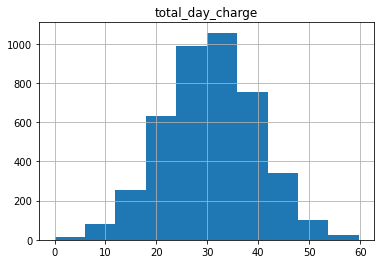

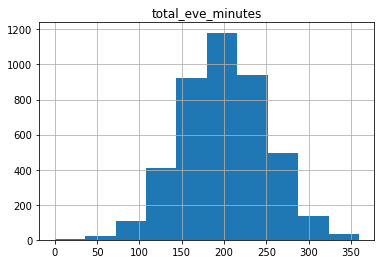

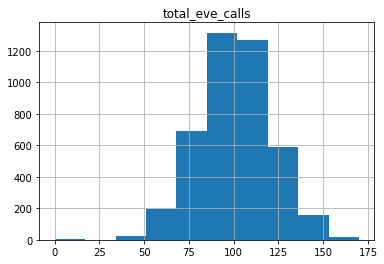

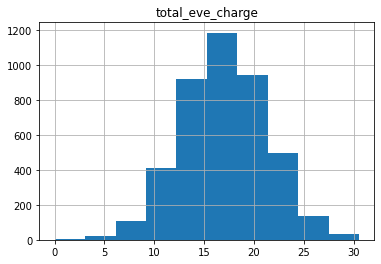

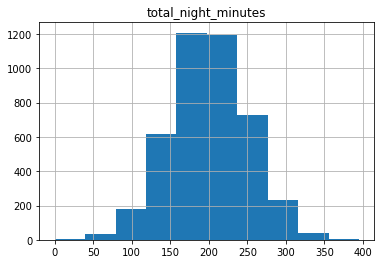

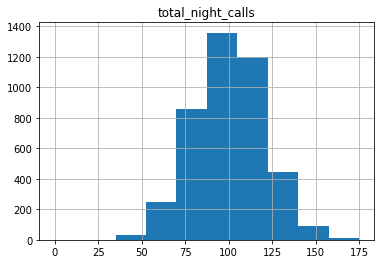

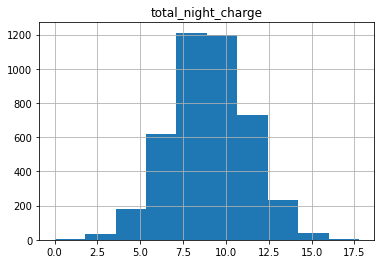

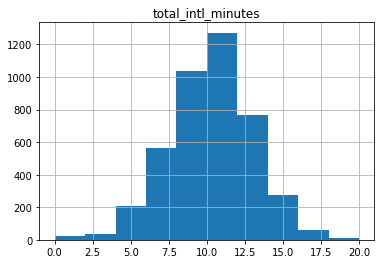

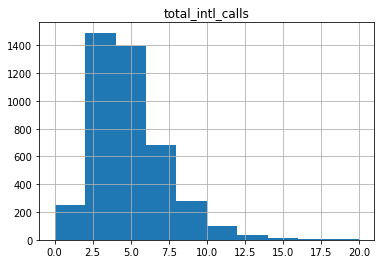

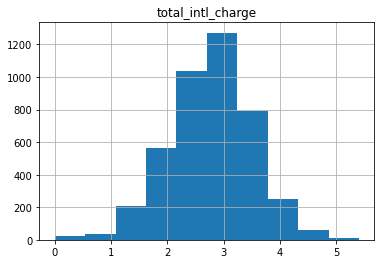

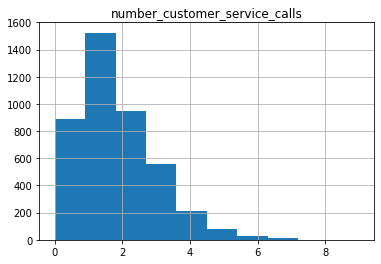

In [153]:
for col in numerical_cols:
  customer_data[col].hist()
  plt.title(col)
  plt.show()

In [ ]:
for col in numerical_cols:
  customer_data.boxplot(column=[col])
  plt.title(col)
  plt.show()

**2. Preprocess Data**

In [154]:
data = customer_data.copy()

In [156]:
# Data Encoding
he = ce.HashingEncoder(cols = 'state')
hashed_data = he.fit_transform(data)
hashed_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [157]:
dummy_data = pd.get_dummies(hashed_data, drop_first = True)
dummy_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,0,0,1,0,0
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,1,0,1,0,0
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,0,1,0,1,0


In [158]:
# Correlation
corr = dummy_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.00,-0.20,-0.13,-0.15,-0.19,-0.11,-0.20,-0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.04,0.00,-0.00,-0.02,-0.00,-0.00,0.02,-0.00,-0.01,0.01,-0.02,-0.00,-0.01,-0.04
col_1,-0.20,1.00,-0.13,-0.16,-0.20,-0.11,-0.20,-0.15,-0.00,-0.02,0.03,0.02,0.03,-0.00,0.00,-0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.02,0.01,-0.01,-0.01,-0.02,0.04
col_2,-0.13,-0.13,1.00,-0.10,-0.13,-0.07,-0.13,-0.09,-0.00,-0.03,-0.02,-0.01,-0.02,0.03,-0.04,0.03,-0.00,0.00,-0.00,0.00,0.02,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01
col_3,-0.15,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.01,0.03,-0.01,0.02,-0.01,0.02,0.00,0.02,0.02,0.02,0.02,-0.00,-0.02,-0.00,0.01,0.02,-0.01,0.01,0.03,-0.01
col_4,-0.19,-0.20,-0.13,-0.16,1.00,-0.11,-0.20,-0.14,0.01,0.01,0.03,-0.00,0.03,0.01,0.01,0.01,0.03,-0.01,0.03,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,0.02,0.00,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.00,0.02,-0.02,-0.00,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.00,-0.03,-0.00,0.01,-0.00,0.01,0.01,0.02,0.03
col_6,-0.20,-0.20,-0.13,-0.16,-0.20,-0.11,1.00,-0.15,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,-0.03,-0.05,-0.02,0.01,-0.02,0.03,0.02,0.03,-0.00,0.00,0.01,-0.02,0.00,-0.03
col_7,-0.14,-0.15,-0.09,-0.12,-0.14,-0.08,-0.15,1.00,-0.02,-0.00,-0.02,-0.01,-0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.02,0.03,0.01,0.01,-0.02
account_length,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.02,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.02,0.03,0.00,0.02
number_vmail_messages,-0.01,-0.02,-0.03,0.03,0.01,0.02,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.01,-0.01,0.00,0.95,-0.10


In [159]:
# Remove high correlation columns
corr_data = dummy_data.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

**3. Training Experiment**

In [160]:
# 1. Oversampling with SMOTE, Scale = MinMax, model = Logistic Regression, XGBoost, RandomForest

X = corr_data.drop(["churn_yes"],axis=1)
y = corr_data['churn_yes']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

# Scale
scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']

scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       721
           1       0.58      0.33      0.42       129

    accuracy                           0.86       850
   macro avg       0.73      0.64      0.67       850
weighted avg       0.84      0.86      0.84       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


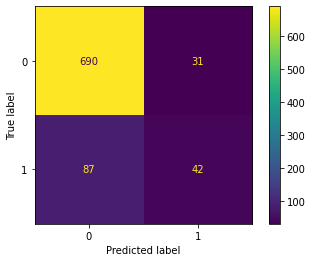

In [171]:
# Logistic Regression
model = LogisticRegression(C=0.5, max_iter=6700) 
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       721
           1       0.86      0.76      0.81       129

    accuracy                           0.94       850
   macro avg       0.91      0.87      0.89       850
weighted avg       0.94      0.94      0.94       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


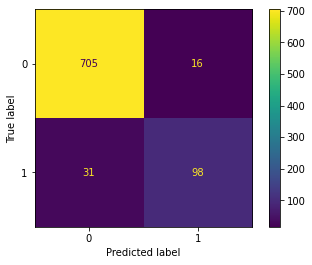

In [185]:
# XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.5,n_estimators = 400,random_state=42)
model.fit(X_train_resample, y_train_resample)

y_pred = model.predict(X_test)
# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       721
           1       0.81      0.57      0.67       129

    accuracy                           0.92       850
   macro avg       0.87      0.78      0.81       850
weighted avg       0.91      0.92      0.91       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


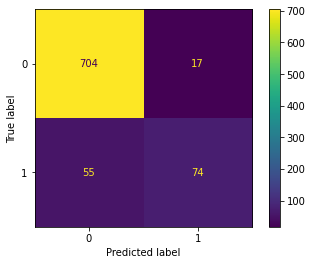

In [194]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

In [195]:
# 2. Oversampling with SMOTE, not scale, model = Logistic Regression, XGBoost, RandomForest
def over_sampling(data):
  X = data.drop(["churn_yes"],axis=1)
  y = data['churn_yes']
  # Split train-test
  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
  # Upsampling = SMOTE
  sm = SMOTE(k_neighbors=5)
  X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

  return X_train_resample, y_train_resample, X_test, y_test


In [196]:
X_train_resample, y_train_resample, X_test, y_test = over_sampling(corr_data)

In [197]:
X_train_resample.shape

(5862, 22)

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       721
           1       0.30      0.70      0.42       129

    accuracy                           0.71       850
   macro avg       0.61      0.70      0.61       850
weighted avg       0.83      0.71      0.75       850



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


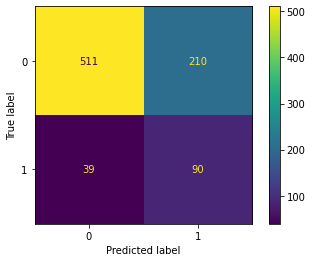

In [198]:
# Logistic Regression
model = LogisticRegression(C=0.01) 
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       721
           1       0.87      0.77      0.81       129

    accuracy                           0.95       850
   macro avg       0.91      0.87      0.89       850
weighted avg       0.95      0.95      0.95       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


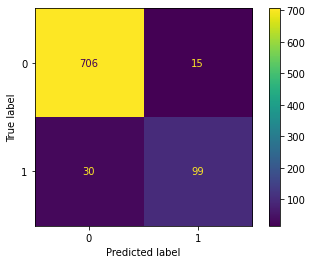

In [206]:
# XGBoost
model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=400,random_state=42)
model.fit(X_train_resample,y_train_resample)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       721
           1       0.82      0.57      0.68       129

    accuracy                           0.92       850
   macro avg       0.87      0.78      0.81       850
weighted avg       0.91      0.92      0.91       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


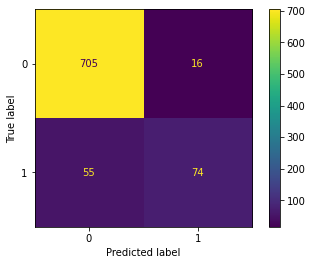

In [210]:
# RandomForest
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

In [211]:
# 3. No oversampling, scale = MinMax, model = Logistic, XGB, RandomForest
scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']

def scale_data(data):
  X = data.drop(["churn_yes"],axis=1)
  y = data['churn_yes']
  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
  # MinMax Scaler
  scaler = MinMaxScaler()
  scaler.fit(X_train[scale_columns])
  X_train[scale_columns] = scaler.transform(X_train[scale_columns])
  X_test[scale_columns] = scaler.transform(X_test[scale_columns])

  return X_train, X_test, y_train, y_test


In [212]:
X_train, X_test, y_train, y_test = scale_data(corr_data)
X_train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes
1340,1,0,0,0,0,0,0,0,0.471074,0.00,...,0.553298,0.741176,0.549620,0.400000,0.642487,0.15,0.111111,1,0,1
3790,0,0,0,0,0,1,0,0,0.479339,0.70,...,0.583635,0.629412,0.512658,0.577143,0.642487,0.25,0.111111,1,0,0
2647,0,0,0,0,1,0,0,0,0.314050,0.34,...,0.559421,0.600000,0.556203,0.554286,0.585492,0.25,0.000000,0,0,0
4009,0,0,0,0,0,0,1,0,0.231405,0.00,...,0.470081,0.529412,0.586835,0.680000,0.176166,0.20,0.111111,1,0,0
3537,0,0,1,0,0,0,0,0,0.458678,0.00,...,0.505149,0.594118,0.507089,0.720000,0.430052,0.35,0.111111,1,0,0


In [213]:
X_train.shape

(3400, 22)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       721
           1       0.72      0.26      0.38       129

    accuracy                           0.87       850
   macro avg       0.80      0.62      0.65       850
weighted avg       0.86      0.87      0.84       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


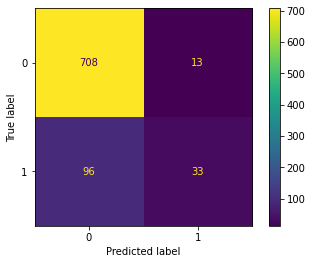

In [226]:
# Logistic Regression
model = LogisticRegression(C=10., max_iter=6700) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       721
           1       0.97      0.81      0.88       129

    accuracy                           0.97       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.97      0.97      0.97       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


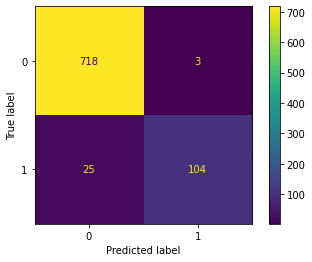

In [227]:
# XGBoost
model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       721
           1       0.97      0.69      0.81       129

    accuracy                           0.95       850
   macro avg       0.96      0.84      0.89       850
weighted avg       0.95      0.95      0.95       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


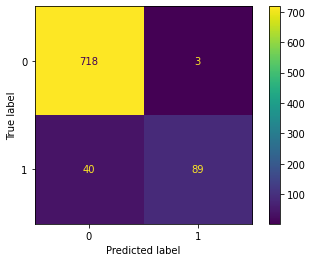

In [228]:
# RandomForest
model = RandomForestClassifier(n_estimators = 200, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

In [229]:
# 4. No oversampling, no scale, model = Logistic Regression, RandomForest, XGB
X = corr_data.drop(["churn_yes"],axis=1)
y = corr_data['churn_yes']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
X_train.shape, y_train.shape

(4250, 22) (4250,)


((3400, 22), (3400,))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       721
           1       0.70      0.26      0.38       129

    accuracy                           0.87       850
   macro avg       0.79      0.62      0.65       850
weighted avg       0.85      0.87      0.84       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


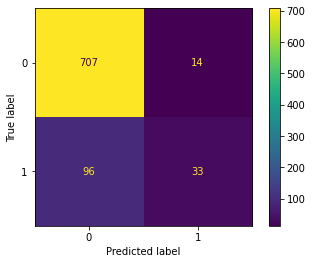

In [233]:
# Logistic Regression
model = LogisticRegression(C=10.0, max_iter=6700) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       721
           1       0.97      0.68      0.80       129

    accuracy                           0.95       850
   macro avg       0.96      0.84      0.89       850
weighted avg       0.95      0.95      0.94       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


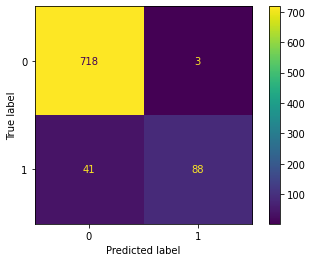

In [234]:
# RandomForest
model = RandomForestClassifier(n_estimators = 200, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       721
           1       0.97      0.81      0.88       129

    accuracy                           0.97       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.97      0.97      0.97       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


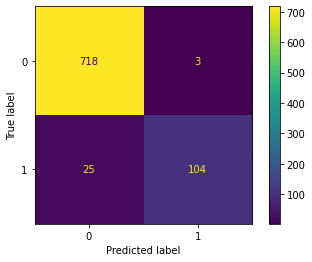

In [235]:
# XGBoost
model = xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

**4. Generate .csv file for submitting to Kaggle**

In [134]:
test = pd.read_csv("/content/test.csv")
id_submit = test['id']

In [135]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [136]:
test.drop(columns=['id'], inplace=True)

In [137]:
hashed_test = he.fit_transform(test)
hashed_test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,0,0,0,0,0,0,128,area_code_415,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,0,0,0,0,0,0,118,area_code_510,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,0,0,0,0,1,62,area_code_415,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,0,1,0,0,0,93,area_code_510,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,1,0,0,0,0,0,0,0,174,area_code_415,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [138]:
test_dummy =  pd.get_dummies(hashed_test,drop_first=True)
test_dummy_drop_corr = test_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


In [139]:
test_dummy_drop_corr.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_yes'],
      dtype='object')

In [140]:
y_pred_submit = model.predict(test_dummy_drop_corr)

In [141]:
y_pred_submit

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
submit_result = pd.DataFrame({'id': id_submit,'churn': y_pred_submit})
submit_result

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [143]:
submit_result.churn.replace([0,1],['no','yes'],inplace=True)
submit_result

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [144]:
submit_result.to_csv("submit.csv", index=False)